In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans

In [3]:
data = pd.read_csv("driver-data.csv", header=0)
data.shape

(4000, 3)

In [4]:
data.head()

,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25


In [5]:
data.describe()

,id,mean_dist_day,mean_over_speed_perc
count,4.000000e+03,4000.000000,4000.000000
mean,3.423312e+09,76.041522,10.721000
std,1.154845e+03,53.469563,13.708543
min,3.423310e+09,15.520000,0.000000
25%,3.423311e+09,45.247500,4.000000
50%,3.423312e+09,53.330000,6.000000
75%,3.423313e+09,65.632500,9.000000
max,3.423314e+09,244.790000,100.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    4000 non-null   int64  
 1   mean_dist_day         4000 non-null   float64
 2   mean_over_speed_perc  4000 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 93.9 KB


In [14]:
#Fiting the data
kmeans  = KMeans(n_clusters=4)
kmeans.fit(data)
print(f"Cluster centres: {kmeans.cluster_centers_}")

Cluster centres: [[3.42331096e+09 7.76455305e+01 1.02180747e+01]
 [3.42331296e+09 7.38755410e+01 1.07714863e+01]
 [3.42331395e+09 7.49120141e+01 1.09617321e+01]
 [3.42331197e+09 7.76724000e+01 1.09440000e+01]]


In [16]:
#Finding the unique values
unique, count = np.unique(kmeans.labels_, return_counts=True)
dict_data = dict(zip(unique, count))
print(f"Count of each clusters:  {dict_data}")

Count of each clusters:  {0: 1013, 1: 993, 2: 992, 3: 1002}


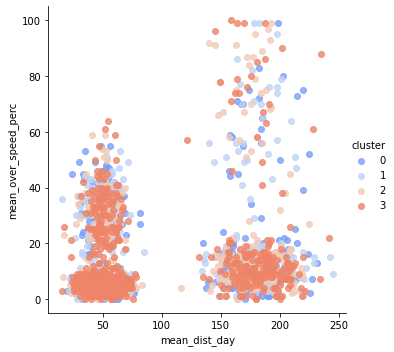

In [19]:
#plot the clusters
data["cluster"] = kmeans.labels_
sns.lmplot("mean_dist_day", "mean_over_speed_perc", data=data, hue="cluster", palette="coolwarm", fit_reg=False)

In [20]:
#Inertia is the sum of the squared error of a cluster
print(f"Intertia: {kmeans.inertia_}")

Intertia: 345600524.06015074


In [24]:
print(f"Data with Clusters: \n{data}")

Data with Cluseters: 
              id  mean_dist_day  mean_over_speed_perc  cluster
0     3423311935          71.24                    28        3
1     3423313212          52.53                    25        1
2     3423313724          64.54                    27        2
3     3423311373          55.69                    22        0
4     3423310999          54.58                    25        0
...          ...            ...                   ...      ...
3995  3423310685         160.04                    10        0
3996  3423312600         176.17                     5        1
3997  3423312921         170.91                    12        1
3998  3423313630         176.14                     5        2
3999  3423311533         168.03                     9        3

[4000 rows x 4 columns]


In [25]:
data.head(10)

,id,mean_dist_day,mean_over_speed_perc,cluster
0,3423311935,71.24,28,3
1,3423313212,52.53,25,1
2,3423313724,64.54,27,2
3,3423311373,55.69,22,0
4,3423310999,54.58,25,0
5,3423313857,41.91,10,2
6,3423312432,58.64,20,3
7,3423311434,52.02,8,0
8,3423311328,31.25,34,0
9,3423312488,44.31,19,1
